In [4]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from keras import layers
from keras.models import Sequential

2023-05-27 19:58:55.463561: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
data_dir_train = pathlib.Path("/Users/dilnazahmetzan/Downloads/capstone2/train")
data_dir_test = pathlib.Path("/Users/dilnazahmetzan/Downloads/capstone2/test")

In [6]:

#Train Image count
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

#Test Image count
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

662
115
662
115


In [7]:
batch_size = 32
img_height = 224
img_width = 224

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',
                                                               seed=123,subset="training",validation_split=0.2)

Found 1908 files belonging to 5 classes.
Using 1527 files for training.


In [9]:
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',
                                                            seed=123,subset="validation",validation_split=0.2)

Found 1908 files belonging to 5 classes.
Using 381 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['acne', 'blackhead', 'carcinoma', 'norm', 'wrinkles']


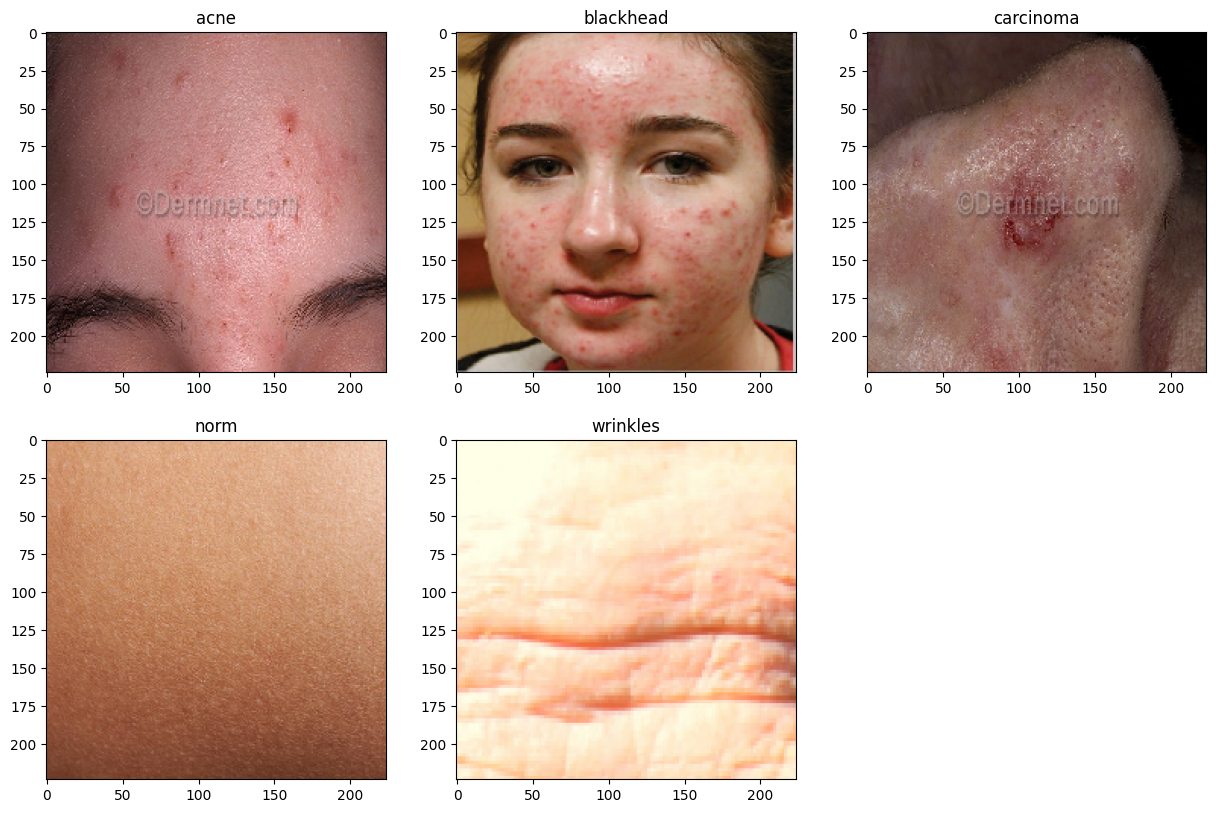

In [105]:
import matplotlib.pyplot as plt
from keras.utils import load_img

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

#Visualize image
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(img_height,img_width)))
    plt.title(c)

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [107]:

rescale = tf.keras.Sequential([
    #To rescale an input in the [0, 255] range to be in the [0, 1] range
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224, 224, 3))
])

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal",
                          input_shape=(img_height,
                                       img_width,
                                       3)),
        layers.RandomRotation(0.1),
        #layers.RandomZoom(0.1),
        #layers.RandomBrightness(0.1),
    ]
)


model.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])


model.summary()

In [12]:
my_callbacks = [
    keras.callbacks.ModelCheckpoint(filepath='moden.{val_accuracy:.2f}.h5')
]

y_pred = model.predict(val_ds)
import scipy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(val_ds, y_pred)
print(cm)
accuracy_score(val_ds, y_pred)

import cv2
import numpy as np

img = cv2.imread('one.png')

pixel = img[801,600]

print (pixel) # pixel value i am searching for

def search_array():
    pixel_tile = np.tile(pixel, (*img.shape[:2], 1))
    diff = np.sum(np.abs(img - pixel_tile), axis=2)
    print("\n".join([f"SUCCESS - {idx}" for idx in np.argwhere(diff == 0)]))

if __name__ == "__main__":
    search_array()

In [109]:
path_to_training_dataset="/Users/dilnazahmetzan/Downloads/capstone2/train/"
import Augmentor

for class_name in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + class_name)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_top_bottom(probability=0.1)
    p.flip_left_right(probability=0.5)
    p.flip_random(probability=0.3)  # Add mirroring

    for j in range(200):
        try:
            p.sample(1)  # Generate one augmented image
        except Exception as e:
            print("Error occurred for image:", p.augmentor_images[j])
            print("Error message:", str(e))
            break

Initialised with 131 image(s) found.
Output directory set to /Users/dilnazahmetzan/Downloads/capstone2/train/acne/output.

Processing <PIL.Image.Image image mode=RGB size=720x471 at 0x7FBCC66C7250>: 100%|██████████| 1/1 [00:00<00:00,  6.06 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=720x471 at 0x7FBCC66C6500>: 100%|██████████| 1/1 [00:00<00:00,  5.62 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=294x222 at 0x7FBCC66C69B0>: 100%|██████████| 1/1 [00:00<00:00, 77.19 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=720x486 at 0x7FBCC66C7040>: 100%|██████████| 1/1 [00:00<00:00, 25.59 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=471x720 at 0x7FBCC66C6E30>: 100%|██████████| 1/1 [00:00<00:00,  6.86 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=612x408 at 0x7FBCC66C6FB0>: 100%|██████████| 1/1 [00:00<00:00, 28.65 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=720x472 at 0x7FBCC66C7340>: 100%|██████████| 1/1 [00:00<00:00, 30.40 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=720x469 at 0x7FBCC66C6FE0>: 100%|█████

Initialised with 193 image(s) found.
Output directory set to /Users/dilnazahmetzan/Downloads/capstone2/train/blackhead/output.

Processing <PIL.Image.Image image mode=RGB size=468x263 at 0x7FBCC5320550>: 100%|██████████| 1/1 [00:00<00:00, 25.74 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=151x130 at 0x7FBCC66C6AD0>: 100%|██████████| 1/1 [00:00<00:00, 91.93 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=615x434 at 0x7FBD747B6EF0>: 100%|██████████| 1/1 [00:00<00:00, 13.88 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=768x512 at 0x7FBCB614ACE0>: 100%|██████████| 1/1 [00:00<00:00,  9.26 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=1155x648 at 0x7FBCC6612590>: 100%|██████████| 1/1 [00:00<00:00,  4.41 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=350x200 at 0x7FBCC76E3A00>: 100%|██████████| 1/1 [00:00<00:00, 34.67 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=360x240 at 0x7FBCC5320550>: 100%|██████████| 1/1 [00:00<00:00, 98.74 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=1000x750 at 0x7FBCC65F87C0>: 100%|██████████| 1/1 [00:0

Error occurred for image: 
        Image path: /Users/dilnazahmetzan/Downloads/capstone2/train/blackhead/b21 — копия.jpg
        Ground truth path: None
        File format (inferred from extension): jpg
        Class label: blackhead
        Numerical class label (auto assigned): 0
        
Error message: 'OSError' object has no attribute 'message'
Initialised with 124 image(s) found.
Output directory set to /Users/dilnazahmetzan/Downloads/capstone2/train/carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=720x487 at 0x7FBCC66C6C50>: 100%|██████████| 1/1 [00:00<00:00, 14.10 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=720x472 at 0x7FBCC66C6F20>: 100%|██████████| 1/1 [00:00<00:00, 15.99 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=720x608 at 0x7FBCC66C6AA0>: 100%|██████████| 1/1 [00:00<00:00, 11.78 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=480x720 at 0x7FBCC66C6C20>: 100%|██████████| 1/1 [00:00<00:00, 14.74 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=720x483 at 0x7FBCC66C67A0>: 100%|██████████| 1/1 [00:00<00:00, 46.98 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=720x561 at 0x7FBCC66C72B0>: 100%|██████████| 1/1 [00:00<00:00, 12.55 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=486x720 at 0x7FBCC66C70A0>: 100%|██████████| 1/1 [00:00<00:00, 43.74 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=720x476 at 0x7FBCC66C7280>: 100%|██████████| 1/1 [00:00<

Initialised with 56 image(s) found.
Output directory set to /Users/dilnazahmetzan/Downloads/capstone2/train/norm/output.

Processing <PIL.Image.Image image mode=RGB size=612x409 at 0x7FBCC53201F0>: 100%|██████████| 1/1 [00:00<00:00, 20.68 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=612x408 at 0x7FBCC7663430>: 100%|██████████| 1/1 [00:00<00:00, 21.04 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=612x418 at 0x7FBCC530F610>: 100%|██████████| 1/1 [00:00<00:00, 21.31 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=612x408 at 0x7FBCC76E3A00>: 100%|██████████| 1/1 [00:00<00:00, 18.25 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=612x408 at 0x7FBCC530F610>: 100%|██████████| 1/1 [00:00<00:00, 17.48 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=612x408 at 0x7FBCC65F87C0>: 100%|██████████| 1/1 [00:00<00:00, 16.18 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=612x610 at 0x7FBCC53201F0>: 100%|██████████| 1/1 [00:00<00:00, 53.40 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=612x408 at 0x7FBCC530F2B0>: 100%|█████

Initialised with 158 image(s) found.
Output directory set to /Users/dilnazahmetzan/Downloads/capstone2/train/wrinkles/output.

Processing <PIL.Image.Image image mode=RGB size=53x68 at 0x7FBCC70ADDB0>: 100%|██████████| 1/1 [00:00<00:00, 199.61 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=32x44 at 0x7FBCC66C7370>: 100%|██████████| 1/1 [00:00<00:00, 133.28 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=40x58 at 0x7FBCC66C69E0>: 100%|██████████| 1/1 [00:00<00:00, 188.81 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=42x77 at 0x7FBCC66C73A0>: 100%|██████████| 1/1 [00:00<00:00, 190.59 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=26x26 at 0x7FBCC66C7D60>: 100%|██████████| 1/1 [00:00<00:00, 118.23 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=29x26 at 0x7FBCC66C7DF0>: 100%|██████████| 1/1 [00:00<00:00, 138.37 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=82x73 at 0x7FBCC77100D0>: 100%|██████████| 1/1 [00:00<00:00, 126.74 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=13x16 at 0x7FBCC66C6980>: 100%|██████████| 1/1 [00:00<00:00, 17

In [13]:
#Count total number of image generated by Augmentor.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

1246


In [14]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list

In [15]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#lesion_list_new

In [16]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [17]:
data_dir_train="/Users/dilnazahmetzan/Downloads/capstone2/train/"

#Training dataset.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,    #20% fraction of data to reserve for validation.
    subset = "training",
    image_size=(img_height, img_width),label_mode='categorical',  #label_mode='categorical' means that the labels are encoded as a categorical vector
    batch_size=batch_size)

Found 1908 files belonging to 5 classes.
Using 1527 files for training.


In [18]:
#Validation dataset.
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset = "validation",
    image_size=(img_height, img_width),label_mode='categorical',   #label_mode='categorical' means that the labels are encoded as a categorical vector
    batch_size=batch_size)

Found 1908 files belonging to 5 classes.
Using 381 files for validation.


In [19]:
rescale_factor = 1.0 / 255.0
train_ds = train_ds.map(lambda x, y: (x * rescale_factor, y))
val_ds = val_ds.map(lambda x, y: (x * rescale_factor, y))

In [20]:

model3 = Sequential()

#model3.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224, 224, 3)))   #Rescaling Layer

#First Convulation layer
model3.add(layers.Conv2D(32,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25,input_shape=( 111, 111, 32)))

#Second Convulation Layer
model3.add(layers.Conv2D(64,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25, input_shape=( 55, 55, 64)))

#Third Convulation Layer
model3.add(layers.Conv2D(128,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten Layer
model3.add(layers.Flatten())

#Dense Layer
model3.add(layers.Dense(512,activation='relu'))

#Dropout layer
model3.add(layers.Dropout(0.25))

#Batch normalization: is a method used to make artificial neural networks faster and more stable through normalization
#of the layers' inputs by re-centering and re-scaling.
model3.add(layers.BatchNormalization())

#Dense Layer
model3.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model3.add(layers.Dropout(0.50, input_shape=(512,)))

#Batch normalization
model3.add(layers.BatchNormalization())

#Dense layer with Softmax activation function.
model3.add(layers.Dense(len(class_names),activation='softmax'))

In [21]:
model3.compile(optimizer='Adam',
               loss="categorical_crossentropy",
               metrics=['accuracy'])

In [119]:
train_ds /= 255.0

TypeError: unsupported operand type(s) for /=: '_BatchDataset' and 'float'

In [22]:
epochs = 35
history = model3.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1,callbacks=my_callbacks)

Epoch 1/35


2023-05-27 19:59:39.238936: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1527]
	 [[{{node Placeholder/_4}}]]
2023-05-27 19:59:39.239666: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1527]
	 [[{{node Placeholder/_4}}]]


48/48 [==============================] - ETA: 0s - loss: 1.9184 - accuracy: 0.2783

2023-05-27 20:02:04.528451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [381]
	 [[{{node Placeholder/_0}}]]
2023-05-27 20:02:04.529687: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [381]
	 [[{{node Placeholder/_0}}]]


48/48 [==============================] - 155s 3s/step - loss: 1.9184 - accuracy: 0.2783 - val_loss: 1.4396 - val_accuracy: 0.3543
Epoch 2/35
48/48 [==============================] - 118s 2s/step - loss: 1.5983 - accuracy: 0.3811 - val_loss: 5.8050 - val_accuracy: 0.3806
Epoch 3/35
48/48 [==============================] - 114s 2s/step - loss: 1.4325 - accuracy: 0.4401 - val_loss: 2.0115 - val_accuracy: 0.5171
Epoch 4/35
48/48 [==============================] - 111s 2s/step - loss: 1.0238 - accuracy: 0.5986 - val_loss: 2.1145 - val_accuracy: 0.5407
Epoch 5/35
48/48 [==============================] - 110s 2s/step - loss: 1.0306 - accuracy: 0.6123 - val_loss: 1.6297 - val_accuracy: 0.5696
Epoch 6/35
48/48 [==============================] - 112s 2s/step - loss: 0.9282 - accuracy: 0.6372 - val_loss: 3.0755 - val_accuracy: 0.3150
Epoch 7/35
48/48 [==============================] - 109s 2s/step - loss: 0.8798 - accuracy: 0.6680 - val_loss: 1.8777 - val_accuracy: 0.5433
Epoch 8/35
48/48 [======

In [32]:
import cv2
from keras.applications.imagenet_utils import preprocess_input

In [33]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 110, 110, 64)      8256      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                  

In [25]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                  

In [ ]:
print("Validation Accuracy:", val_accuracy)

In [38]:
from keras.applications import  VGG19
from keras.models import Model
from keras.applications.vgg19 import preprocess_input
import joblib

In [40]:
vgg16 = VGG19(include_top=False,weights='imagenet')

In [41]:
filename="vgg16.sav"
joblib.dump(vgg16,open(filename,'wb'))

In [42]:
vgg19=joblib.load("vgg16.sav")

In [43]:
def load_img(img_path):
    images=[]
    img=cv2.imread(img_path)
    img=cv2.resize(img,(100,100))
    images.append(img)
    x_test=np.asarray(images)
    test_img=preprocess_input(x_test)
    features_test=vgg16.predict(test_img)
    num_test=x_test.shape[0]
    f_img=features_test.reshape(num_test,4608)

    return f_img

In [78]:
from tensorflow.python.keras.models import model_from_json
from tensorflow.python.keras.models import load_model
model = load_model('/Users/dilnazahmetzan/Downloads/skin-assistant/model/mode.0.80.h5')


ValueError: Unknown layer: Rescaling. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [73]:
json_file = open('/Users/dilnazahmetzan/Downloads/skin-assistant/model/my_skin_80_tfjs/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
#loaded_model.load_weights("/Users/dilnazahmetzan/DataspellProjects/capstone/model_skin1.h5")


ValueError: Improper config format: {'format': 'layers-model', 'generatedBy': 'keras v2.12.0', 'convertedBy': 'TensorFlow.js Converter v4.6.0', 'modelTopology': {'keras_version': '2.12.0', 'backend': 'tensorflow', 'model_config': {'class_name': 'Sequential', 'config': {'name': 'sequential_2', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 224, 224, 3], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'rescaling_2_input'}}, {'class_name': 'Rescaling', 'config': {'name': 'rescaling_2', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 224, 224, 3], 'scale': 0.00392156862745098, 'offset': 0.0}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d_6', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [2, 2], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_6', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}}, {'class_name': 'Dropout', 'config': {'name': 'dropout_8', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 111, 111, 32], 'rate': 0.25, 'noise_shape': None, 'seed': None}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d_7', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': [2, 2], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_7', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}}, {'class_name': 'Dropout', 'config': {'name': 'dropout_9', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 55, 55, 64], 'rate': 0.25, 'noise_shape': None, 'seed': None}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d_8', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [2, 2], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_8', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}}, {'class_name': 'Flatten', 'config': {'name': 'flatten_2', 'trainable': True, 'dtype': 'float32', 'data_format': 'channels_last'}}, {'class_name': 'Dense', 'config': {'name': 'dense_4', 'trainable': True, 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dropout', 'config': {'name': 'dropout_10', 'trainable': True, 'dtype': 'float32', 'rate': 0.25, 'noise_shape': None, 'seed': None}}, {'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization_2', 'trainable': True, 'dtype': 'float32', 'axis': [1], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_5', 'trainable': True, 'dtype': 'float32', 'units': 128, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dropout', 'config': {'name': 'dropout_11', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 512], 'rate': 0.5, 'noise_shape': None, 'seed': None}}, {'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization_3', 'trainable': True, 'dtype': 'float32', 'axis': [1], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_6', 'trainable': True, 'dtype': 'float32', 'units': 5, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}]}}, 'training_config': {'loss': 'categorical_crossentropy', 'metrics': [[{'class_name': 'MeanMetricWrapper', 'config': {'name': 'accuracy', 'dtype': 'float32', 'fn': 'categorical_accuracy'}}]], 'weighted_metrics': None, 'loss_weights': None, 'optimizer_config': {'class_name': 'Custom>Adam', 'config': {'name': 'Adam', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'jit_compile': False, 'is_legacy_optimizer': False, 'learning_rate': 0.0010000000474974513, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}}}}, 'weightsManifest': [{'paths': ['group1-shard1of46.bin', 'group1-shard2of46.bin', 'group1-shard3of46.bin', 'group1-shard4of46.bin', 'group1-shard5of46.bin', 'group1-shard6of46.bin', 'group1-shard7of46.bin', 'group1-shard8of46.bin', 'group1-shard9of46.bin', 'group1-shard10of46.bin', 'group1-shard11of46.bin', 'group1-shard12of46.bin', 'group1-shard13of46.bin', 'group1-shard14of46.bin', 'group1-shard15of46.bin', 'group1-shard16of46.bin', 'group1-shard17of46.bin', 'group1-shard18of46.bin', 'group1-shard19of46.bin', 'group1-shard20of46.bin', 'group1-shard21of46.bin', 'group1-shard22of46.bin', 'group1-shard23of46.bin', 'group1-shard24of46.bin', 'group1-shard25of46.bin', 'group1-shard26of46.bin', 'group1-shard27of46.bin', 'group1-shard28of46.bin', 'group1-shard29of46.bin', 'group1-shard30of46.bin', 'group1-shard31of46.bin', 'group1-shard32of46.bin', 'group1-shard33of46.bin', 'group1-shard34of46.bin', 'group1-shard35of46.bin', 'group1-shard36of46.bin', 'group1-shard37of46.bin', 'group1-shard38of46.bin', 'group1-shard39of46.bin', 'group1-shard40of46.bin', 'group1-shard41of46.bin', 'group1-shard42of46.bin', 'group1-shard43of46.bin', 'group1-shard44of46.bin', 'group1-shard45of46.bin', 'group1-shard46of46.bin'], 'weights': [{'name': 'batch_normalization_2/gamma', 'shape': [512], 'dtype': 'float32'}, {'name': 'batch_normalization_2/beta', 'shape': [512], 'dtype': 'float32'}, {'name': 'batch_normalization_2/moving_mean', 'shape': [512], 'dtype': 'float32'}, {'name': 'batch_normalization_2/moving_variance', 'shape': [512], 'dtype': 'float32'}, {'name': 'batch_normalization_3/gamma', 'shape': [128], 'dtype': 'float32'}, {'name': 'batch_normalization_3/beta', 'shape': [128], 'dtype': 'float32'}, {'name': 'batch_normalization_3/moving_mean', 'shape': [128], 'dtype': 'float32'}, {'name': 'batch_normalization_3/moving_variance', 'shape': [128], 'dtype': 'float32'}, {'name': 'conv2d_6/kernel', 'shape': [2, 2, 3, 32], 'dtype': 'float32'}, {'name': 'conv2d_6/bias', 'shape': [32], 'dtype': 'float32'}, {'name': 'conv2d_7/kernel', 'shape': [2, 2, 32, 64], 'dtype': 'float32'}, {'name': 'conv2d_7/bias', 'shape': [64], 'dtype': 'float32'}, {'name': 'conv2d_8/kernel', 'shape': [2, 2, 64, 128], 'dtype': 'float32'}, {'name': 'conv2d_8/bias', 'shape': [128], 'dtype': 'float32'}, {'name': 'dense_4/kernel', 'shape': [93312, 512], 'dtype': 'float32'}, {'name': 'dense_4/bias', 'shape': [512], 'dtype': 'float32'}, {'name': 'dense_5/kernel', 'shape': [512, 128], 'dtype': 'float32'}, {'name': 'dense_5/bias', 'shape': [128], 'dtype': 'float32'}, {'name': 'dense_6/kernel', 'shape': [128, 5], 'dtype': 'float32'}, {'name': 'dense_6/bias', 'shape': [5], 'dtype': 'float32'}]}]}

In [44]:
img=load_img("/Users/dilnazahmetzan/Downloads/capstone2/test/blackhead/bb.jpg")

1/1 [==============================] - 1s 1s/step


In [45]:
np.argmax(model3.predict(img))

ValueError: in user code:

    File "/Users/dilnazahmetzan/anaconda3/envs/capstone/lib/python3.10/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/Users/dilnazahmetzan/anaconda3/envs/capstone/lib/python3.10/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/dilnazahmetzan/anaconda3/envs/capstone/lib/python3.10/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/dilnazahmetzan/anaconda3/envs/capstone/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/Users/dilnazahmetzan/anaconda3/envs/capstone/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/dilnazahmetzan/anaconda3/envs/capstone/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 4608)


In [26]:
model = keras.models.load_model('mode.0.83.h5')

In [33]:
image = tf.keras.utils.load_img('/Users/dilnazahmetzan/Downloads/capstone2/test/norm/istockphoto-1264937757-612x612 — копия.jpg',target_size =(224,224))
input_arr = tf.keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)
print(predictions)

1/1 [==============================] - 0s 124ms/step
[[0. 0. 0. 1. 0.]]


In [53]:
print(predictions)

[[0.01332552 0.19362585 0.34386626 0.02153174 0.42765066]]


In [54]:
predicted_class_index = np.argmax(predictions)

# Assuming you have a list of class labels
class_labels = ['Class1', 'Class2', 'Class3', 'Class4', 'Class5']

# Get the predicted class label based on the index
predicted_class = class_labels[predicted_class_index]

# Print the predicted class
print("Predicted Class:", predicted_class)

Predicted Class: Class2


In [ ]:
load

In [23]:
model3.save("rabota.h5")

In [24]:
!tensorflowjs_converter \
    --input_format=keras \
    rabota.h5 \
    rabota

In [41]:
from keras.utils.vis_utils import plot_model
plot_model(model3, to_file='model_plot.png', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


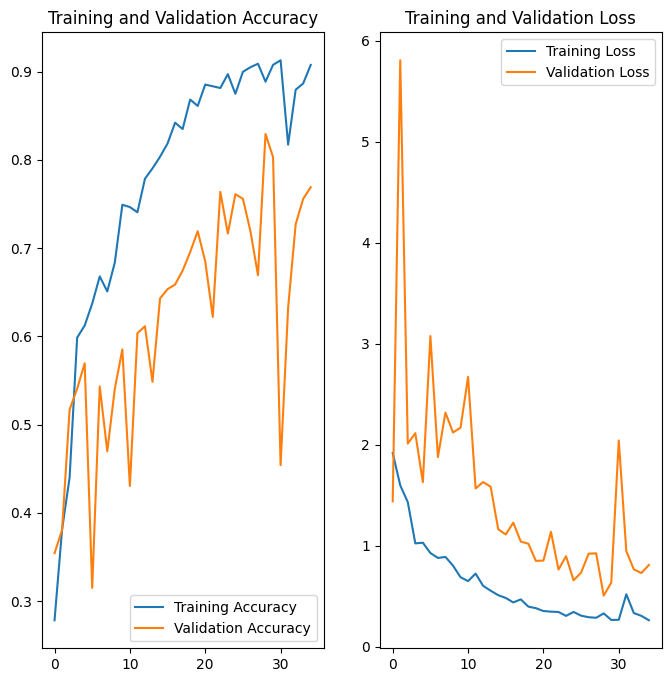

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model3.predict(val_ds)
accuracy_score(val_ds, y_pred)


10/10 [==============================] - 12s 987ms/step


ValueError: Found input variables with inconsistent numbers of samples: [10, 293]